In [1]:
"""
Technical Indicators Analysis
Author: Priyanka
Day 3 - Indicator Exploration and Strategy Insights
"""

import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.data_loader import DataLoader
from src.data.preprocessor import DataPreprocessor
from src.indicators.technical_indicators import TechnicalIndicators
from src.indicators.indicator_visualizer import IndicatorVisualizer

plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)


In [3]:
# Initialize tools
loader = DataLoader()
preprocessor = DataPreprocessor()
indicators = TechnicalIndicators()
viz = IndicatorVisualizer()

# Load AAPL data
print(" Loading AAPL data...")
df = loader.load_data('AAPL', '2020-01-01', '2024-01-01')
df['date'] = pd.to_datetime(df['date'])

# Process and add indicators
df_clean = preprocessor.clean_data(df)
df_features = preprocessor.add_basic_features(df_clean)
df_indicators = indicators.add_all_indicators(df_features)

print(f"\n Loaded {len(df_indicators)} days of data")
print(f" Total columns: {len(df_indicators.columns)}")
df_indicators.head()

✅ DataLoader initialized!
DataPreprocessor initialized!
✅ TechnicalIndicators initialized!
✅ IndicatorVisualizer initialized!
 Loading AAPL data...
📂 Loading data from data/raw/AAPL_2020-01-01_2024-01-01.csv
✅ Loaded 1006 rows

 Cleaning data...
    Sorted data by date
     Found 4 volume outliers (keeping them)
    Final shape: (1006, 8)

 Adding basic features...
    Added daily returns
    Added log returns
    Added price range
    Added price change
    Added up/down indicator
    Added volume change
    Added 5-day moving average
    Added 20-day moving average
    Dropped 19 rows with NaN from rolling calculations
📊 Adding technical indicators...
   ✅ Added Moving Averages (SMA, EMA)
   ✅ Added RSI
   ✅ Added MACD
   ✅ Added Bollinger Bands
   ✅ Added ATR
   ✅ Added Stochastic Oscillator
   ✅ Added OBV
   ✅ Added VWAP
   ✅ Added ADX

✨ Total indicators added: 19

 Loaded 987 days of data
 Total columns: 35


,date,open,high,low,close,volume,dividends,stock splits,returns,log_returns,price_range,price_change,is_up_day,volume_change,ma_5,ma_20,sma_10,sma_20,sma_50,ema_12,ema_26,rsi,macd,macd_signal,macd_histogram,bb_upper,bb_middle,bb_lower,bb_width,atr,stoch_k,stoch_d,obv,vwap,adx
19,2020-01-30 05:00:00,77.414659,78.272028,76.982348,78.218895,126743200,0.0,0.0,-0.001449,-0.001450,1.289680,0.804236,1,-0.413848,76.953853,75.360955,NaN,NaN,NaN,78.218895,78.218895,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,77.824424,NaN
20,2020-01-31 05:00:00,77.508856,77.931504,74.456132,74.750778,199588400,0.0,0.0,-0.044339,-0.045352,3.475372,-2.758078,0,0.574746,76.528792,75.471569,NaN,NaN,NaN,77.685339,77.961997,NaN,-0.276659,-0.055332,-0.221327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-199588400.0,76.532932,NaN
21,2020-02-03 05:00:00,73.492492,75.712000,72.990148,74.545494,173788400,0.0,0.0,-0.002746,-0.002750,2.721852,1.053002,1,-0.129266,76.514786,75.607179,NaN,NaN,NaN,77.202286,77.708923,NaN,-0.506638,-0.145593,-0.361045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-373376800.0,75.797270,NaN
22,2020-02-04 05:00:00,76.151579,77.197336,75.745838,77.006538,136616400,0.0,0.0,0.033014,0.032481,1.451498,0.854959,1,-0.213892,76.570825,75.837222,NaN,NaN,NaN,77.172171,77.656895,NaN,-0.484724,-0.213419,-0.271305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-236760400.0,75.980209,NaN
23,2020-02-05 05:00:00,78.134357,78.433838,77.030647,77.634430,118826800,0.0,0.0,0.008154,0.008121,1.403191,-0.499927,0,-0.130216,76.431227,76.115687,NaN,NaN,NaN,77.243287,77.655231,NaN,-0.411943,-0.253124,-0.158819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-117933600.0,76.250622,NaN


📊 RSI ANALYSIS

📈 Current RSI: 40.19
🔵 NEUTRAL - No clear signal

RSI Statistics:
  Mean: 55.05
  Std Dev: 16.80
  Min: 3.18
  Max: 93.24

📊 Signal Count:
  Oversold days (RSI < 30): 78
  Overbought days (RSI > 70): 196


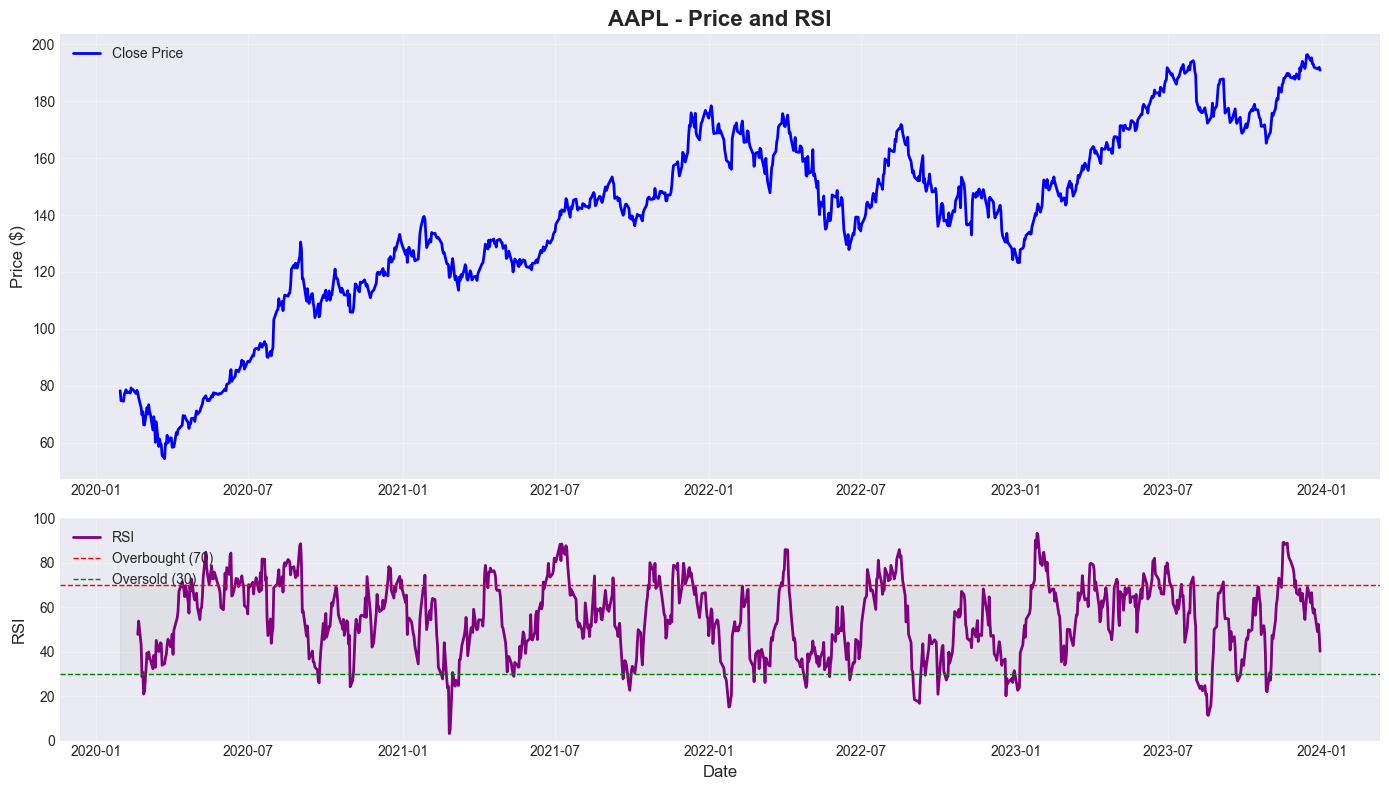

In [4]:
print("="*60)
print("📊 RSI ANALYSIS")
print("="*60)

# Current RSI
current_rsi = df_indicators['rsi'].iloc[-1]
print(f"\n📈 Current RSI: {current_rsi:.2f}")

if current_rsi > 70:
    print("⚠️  OVERBOUGHT - Consider selling")
elif current_rsi < 30:
    print("💚 OVERSOLD - Consider buying")
else:
    print("🔵 NEUTRAL - No clear signal")

# RSI statistics
print(f"\nRSI Statistics:")
print(f"  Mean: {df_indicators['rsi'].mean():.2f}")
print(f"  Std Dev: {df_indicators['rsi'].std():.2f}")
print(f"  Min: {df_indicators['rsi'].min():.2f}")
print(f"  Max: {df_indicators['rsi'].max():.2f}")

# Count signals
oversold_days = (df_indicators['rsi'] < 30).sum()
overbought_days = (df_indicators['rsi'] > 70).sum()

print(f"\n📊 Signal Count:")
print(f"  Oversold days (RSI < 30): {oversold_days}")
print(f"  Overbought days (RSI > 70): {overbought_days}")

# Visualize
viz.plot_rsi(df_indicators, 'AAPL', save=False)


📊 MACD ANALYSIS

📈 Current Values:
  MACD: 1.5610
  Signal: 2.4270
  Histogram: -0.8659

🔴 BEARISH - MACD below signal line

📊 Crossover Count:
  Bullish crossovers: 35
  Bearish crossovers: -36


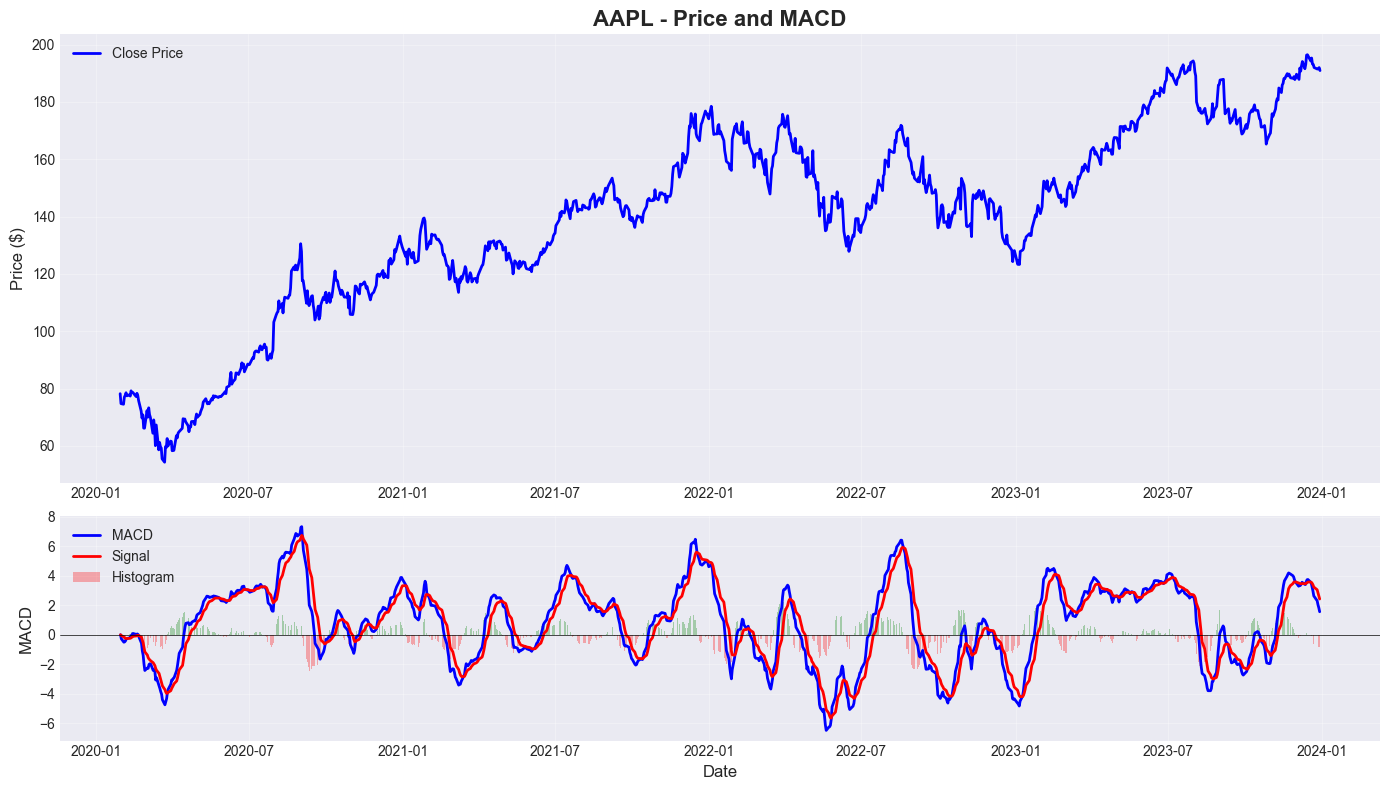

In [5]:
print("="*60)
print("📊 MACD ANALYSIS")
print("="*60)

# Current values
current_macd = df_indicators['macd'].iloc[-1]
current_signal = df_indicators['macd_signal'].iloc[-1]
current_histogram = df_indicators['macd_histogram'].iloc[-1]

print(f"\n📈 Current Values:")
print(f"  MACD: {current_macd:.4f}")
print(f"  Signal: {current_signal:.4f}")
print(f"  Histogram: {current_histogram:.4f}")

# Trading signal
if current_macd > current_signal and current_histogram > 0:
    print("\n🟢 BULLISH - MACD above signal line")
elif current_macd < current_signal and current_histogram < 0:
    print("\n🔴 BEARISH - MACD below signal line")
else:
    print("\n🔵 NEUTRAL")

# Find crossovers
df_indicators['macd_crossover'] = np.where(
    (df_indicators['macd'] > df_indicators['macd_signal']) &
    (df_indicators['macd'].shift(1) <= df_indicators['macd_signal'].shift(1)),
    1, 0
)

df_indicators['macd_crossunder'] = np.where(
    (df_indicators['macd'] < df_indicators['macd_signal']) &
    (df_indicators['macd'].shift(1) >= df_indicators['macd_signal'].shift(1)),
    -1, 0
)

bullish_crosses = df_indicators['macd_crossover'].sum()
bearish_crosses = df_indicators['macd_crossunder'].sum()

print(f"\n📊 Crossover Count:")
print(f"  Bullish crossovers: {bullish_crosses}")
print(f"  Bearish crossovers: {bearish_crosses}")

# Visualize
viz.plot_macd(df_indicators, 'AAPL', save=False)


📊 BOLLINGER BANDS ANALYSIS

📈 Current Values:
  Price: $190.91
  Upper Band: $197.15
  Middle Band: $192.68
  Lower Band: $188.20
  Band Width: $8.95

🔵 Price within bands - 30.3% from lower to upper
⚡ SQUEEZE detected - Expect volatility increase


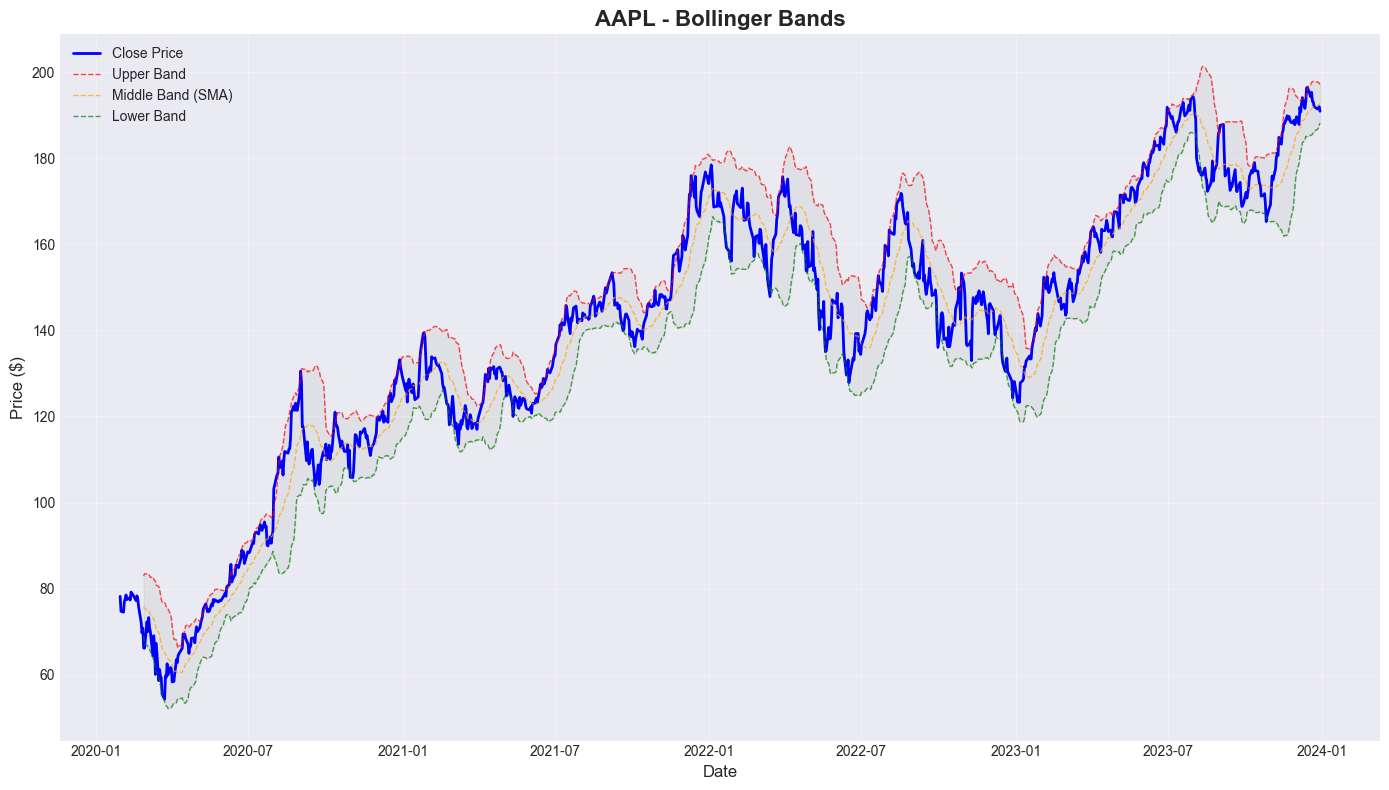

In [6]:
print("="*60)
print("📊 BOLLINGER BANDS ANALYSIS")
print("="*60)

# Current values
current_price = df_indicators['close'].iloc[-1]
current_upper = df_indicators['bb_upper'].iloc[-1]
current_middle = df_indicators['bb_middle'].iloc[-1]
current_lower = df_indicators['bb_lower'].iloc[-1]
current_width = df_indicators['bb_width'].iloc[-1]

print(f"\n📈 Current Values:")
print(f"  Price: ${current_price:.2f}")
print(f"  Upper Band: ${current_upper:.2f}")
print(f"  Middle Band: ${current_middle:.2f}")
print(f"  Lower Band: ${current_lower:.2f}")
print(f"  Band Width: ${current_width:.2f}")

# Position within bands
if current_price > current_upper:
    print("\n⚠️  Price ABOVE upper band - Overbought")
elif current_price < current_lower:
    print("\n💚 Price BELOW lower band - Oversold")
else:
    position = (current_price - current_lower) / (current_upper - current_lower)
    print(f"\n🔵 Price within bands - {position:.1%} from lower to upper")

# Band squeeze detection (volatility)
avg_width = df_indicators['bb_width'].mean()
if current_width < avg_width * 0.7:
    print("⚡ SQUEEZE detected - Expect volatility increase")
elif current_width > avg_width * 1.3:
    print("📈 HIGH volatility period")

# Visualize
viz.plot_bollinger_bands(df_indicators, 'AAPL', save=False)


In [7]:
print("="*60)
print("🎯 COMBINED SIGNAL ANALYSIS")
print("="*60)

# Generate buy/sell signals based on multiple indicators
df_signals = df_indicators.copy()

# RSI signals
df_signals['rsi_signal'] = np.where(df_signals['rsi'] < 30, 1,  # Buy
                                     np.where(df_signals['rsi'] > 70, -1,  # Sell
                                             0))  # Neutral

# MACD signals
df_signals['macd_signal_flag'] = np.where(
    df_signals['macd'] > df_signals['macd_signal'], 1,  # Bullish
    -1  # Bearish
)

# Bollinger signals
df_signals['bb_signal'] = np.where(
    df_signals['close'] < df_signals['bb_lower'], 1,  # Buy
    np.where(df_signals['close'] > df_signals['bb_upper'], -1,  # Sell
            0)  # Neutral
)

# Combined signal (majority vote)
df_signals['combined_signal'] = (
    df_signals['rsi_signal'] + 
    df_signals['macd_signal_flag'] + 
    df_signals['bb_signal']
)

# Current combined signal
current_combined = df_signals['combined_signal'].iloc[-1]

print(f"\n📊 Current Signal Summary:")
print(f"  RSI Signal: {df_signals['rsi_signal'].iloc[-1]}")
print(f"  MACD Signal: {df_signals['macd_signal_flag'].iloc[-1]}")
print(f"  BB Signal: {df_signals['bb_signal'].iloc[-1]}")
print(f"  Combined Score: {current_combined}")

if current_combined >= 2:
    print("\n🟢 STRONG BUY - Multiple indicators agree")
elif current_combined == 1:
    print("\n💚 WEAK BUY - Some indicators bullish")
elif current_combined == -1:
    print("\n🔴 WEAK SELL - Some indicators bearish")
elif current_combined <= -2:
    print("\n⚠️  STRONG SELL - Multiple indicators agree")
else:
    print("\n🔵 NEUTRAL - Mixed signals")


🎯 COMBINED SIGNAL ANALYSIS

📊 Current Signal Summary:
  RSI Signal: 0
  MACD Signal: -1
  BB Signal: 0
  Combined Score: -1

🔴 WEAK SELL - Some indicators bearish


🔗 INDICATOR CORRELATION


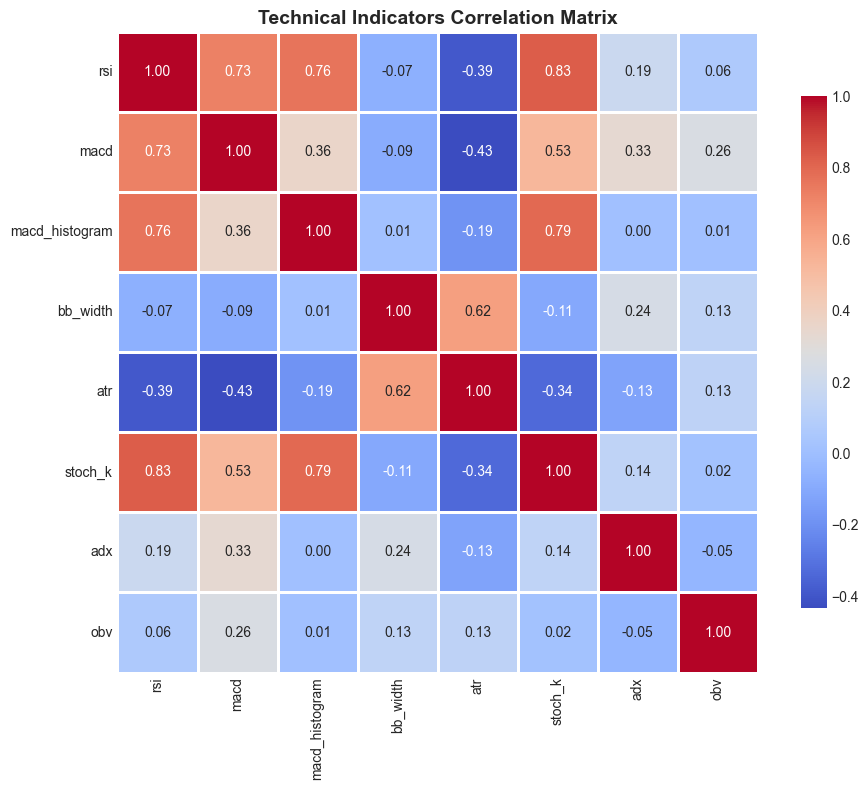

In [8]:
print("="*60)
print("🔗 INDICATOR CORRELATION")
print("="*60)

# Select indicators for correlation
indicator_cols = ['rsi', 'macd', 'macd_histogram', 'bb_width', 
                  'atr', 'stoch_k', 'adx', 'obv']

correlation_matrix = df_indicators[indicator_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
           square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Technical Indicators Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [10]:
import os

# Create output directory
os.makedirs('data/processed', exist_ok=True)

# Save data with signals
output_file = 'data/processed/AAPL_with_indicators_and_signals.csv'
df_signals.to_csv(output_file, index=False)

print("="*60)
print("✅ DAY 3 ANALYSIS COMPLETE!")
print("="*60)
print(f"📊 Analyzed {len(df_indicators)} days of data")
print(f"📈 Implemented 9+ technical indicators")
print(f"🎯 Generated trading signals")
print(f"💾 Saved to: {output_file}")


✅ DAY 3 ANALYSIS COMPLETE!
📊 Analyzed 987 days of data
📈 Implemented 9+ technical indicators
🎯 Generated trading signals
💾 Saved to: data/processed/AAPL_with_indicators_and_signals.csv
